
## CRISP-DM Step 1: Business Understanding 
### Our goal is to analyze Airbnb rental data in EU cities to understand the relationship
### between rental prices and guest satisfaction. We aim to identify the most and least satisfying cities based on
### guest ratings and finally, we explore how rental prices vary in those cities vs. the standard long-term rentals.

### Main Steps:
#### Step 1: Gather data from CSV files containing Airbnb rental data for different EU cities.
#### Step 2: Assess the data by exploring the columns and calculating basic statistics.
#### Step 3: Clean the data by handling any missing values and outliers.
#### Step 4: Analyze the data by performing market studies, correlation analysis, and creating visualizations.
#### Step 5: Model the data using linear regression and other techniques to predict rental prices.
#### Step 6: Visualize the results and analyze the performance of the models.
#### Step 7: Communicate the findings and insights derived from the analysis => See the associated Medium blog


In [1]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 50)
import os

### Data Understanding 
#### Load the Airbnb rental data, explore the available columns, and check for any missing values
#### or potential wrong values in the dataset. Calculate average and median rental prices per city 
#### IO & Dataset Ingestion / Step 1: Gather data from CSV files w/ Airbnb rental data for  EU cities.

<a id="section-model"></a>
<h1 style='background:#afd873; border:10; border-radius: 25px; font-size:250%; font-weight: bold; color:black'><center>Airbnb LM Analysis on EU Cities</center></h1>

In [2]:
def read_and_concat_dataframes(data_directory):
    """
    Read and concatenate dataframes from CSV files in the given directory.

    Parameters:
        data_directory (str): The path to the directory containing CSV files.

    Returns:
        df (pd.DataFrame): The concatenated DataFrame.
    """
    df_list = []
    for dirname, _, filenames in os.walk(data_directory):
        for filename in filenames:
            file_path = os.path.join(dirname, filename)
            df_tmp = pd.read_csv(file_path)
            df_tmp['city'] = filename.split('_')[0]
            df_tmp['period'] = filename.split('_')[-1].replace('.csv', '')
            df_list.append(df_tmp)
            print(filename)
    df = pd.concat(df_list, axis=0).drop(['Unnamed: 0'], axis=1).drop_duplicates()
    return df

# File ingestion from many CSV files and first look at data
data_directory = './data/'
df = read_and_concat_dataframes(data_directory)

# Data and DDL schema Preview
# Check available columns in the DataFrame
print(f'\nAggregate Table (rows, cols) =', df.shape, '\n')
print(f'Columns:', df.columns)
print(f'\nAirbnb Samples (realSum = Full price in EUR for 2 pers. per 2 nights)')
print(df.sample(3).T)

amsterdam_weekdays.csv
amsterdam_weekends.csv
athens_weekdays.csv
athens_weekends.csv
barcelona_weekdays.csv
barcelona_weekends.csv
berlin_weekdays.csv
berlin_weekends.csv
budapest_weekdays.csv
budapest_weekends.csv
lisbon_weekdays.csv
lisbon_weekends.csv
london_weekdays.csv
london_weekends.csv
paris_weekdays.csv
paris_weekends.csv
rome_weekdays.csv
rome_weekends.csv
vienna_weekdays.csv
vienna_weekends.csv

Aggregate Table (rows, cols) = (51707, 21) 

Columns: Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'city', 'period'],
      dtype='object')

Airbnb Samples (realSum = Full price in EUR for 2 pers. per 2 nights)
                                    4266             1137             4569
realSum                        231.6

# EU Cities Airbnb Ranking: Travellers' Statistics

#### Step 2: Assess the data by exploring the columns and calculating basic statistics.
#### Q1: Which are the EU’s most and least expensive cities for a short vacation?

In [3]:
"""
Step 2: Assess the data by exploring the columns and calculating basic statistics.

Q1: Which are the EU’s most and least expensive cities for a short vacation?

This step involves calculating average and median realSum (prices) per city to determine the most and least expensive cities
for a short vacation based on Airbnb pricing.

Parameters:
    df (DataFrame): The input dataset containing relevant columns, including 'city' and 'realSum'.

Returns:
    None (Prints the ranked list of cities based on average and median realSum, and a table for the top 10 European cities
    showing their average and median Airbnb pricing).
"""

# Calculate average and median realSum (prices) per city
avg_realSum_per_city = df.groupby('city')['realSum'].mean()
median_realSum_per_city = df.groupby('city')['realSum'].median()

# Sort the Series in descending order based on the values (median realSum)
sorted_avg_realSum = avg_realSum_per_city.sort_values(ascending=False)
sorted_median_realSum = median_realSum_per_city.sort_values(ascending=False)

print("Ranked by Average realSum:")
print(sorted_avg_realSum)
print("\nRanked by Median realSum:")
print(sorted_median_realSum)
print('\n\n')

# Centralize the above in a table
# Average realSum per city (Ranked by Average realSum)
avg_realSum_per_city = df.groupby('city')['realSum'].mean().sort_values(ascending=False)

# Median realSum per city (Ranked by Median realSum)
median_realSum_per_city = df.groupby('city')['realSum'].median().sort_values(ascending=False)

# Combine the two Series and reset their indices
avg_realSum_per_city = avg_realSum_per_city.reset_index(drop=True)
median_realSum_per_city = median_realSum_per_city.reset_index(drop=True)

# Combine the two Series into a single DataFrame with properly aligned indices
pricing_table = pd.DataFrame({
    'Average realSum': avg_realSum_per_city,
    'Median realSum': median_realSum_per_city
})

# Sort the pricing_table DataFrame by Median realSum in descending order
pricing_table = pricing_table.sort_values(by='Median realSum', ascending=False)

print("Table for Average and Median Airbnb pricing in the top 10 European cities:")
print(pricing_table.head(10))  # Displaying the top 10 cities for brevity

Ranked by Average realSum:
city
amsterdam    573.112795
paris        392.531403
london       362.469256
barcelona    293.753706
berlin       244.583752
vienna       241.582484
lisbon       238.210479
rome         205.391950
budapest     176.513548
athens       151.744121
Name: realSum, dtype: float64

Ranked by Median realSum:
city
amsterdam    460.244183
paris        317.597167
london       261.294950
lisbon       225.375235
vienna       208.494028
barcelona    208.299393
berlin       191.175096
rome         182.591822
budapest     152.982093
athens       127.715417
Name: realSum, dtype: float64



Table for Average and Median Airbnb pricing in the top 10 European cities:
   Average realSum  Median realSum
0       573.112795      460.244183
1       392.531403      317.597167
2       362.469256      261.294950
3       293.753706      225.375235
4       244.583752      208.494028
5       241.582484      208.299393
6       238.210479      191.175096
7       205.391950      182.591822
8  

### Step 3: Data Quality Checks
#### Data Quality: Basic Checks & Data Preparation: Prepare the data by handling any missing values and potential outliers. 

In [4]:
def calculate_data_quality(df):
    """
    Calculate data quality information for the given DataFrame.

    This function checks for NaNs, null values, and realSum == 0 for each city in the DataFrame.
    It calculates variance, skewness, and identifies outliers above and below 1% percentile.

    Parameters:
        df (pandas.DataFrame): The input DataFrame containing relevant columns, including 'city' and 'realSum'.

    Returns:
        pandas.DataFrame: The data quality information for each city in the DataFrame.
    """
    # Check for NaNs and null values in the dataset
    nan_counts = df.isnull().sum()
    print("\nNaN Counts:")
    print(nan_counts)

    # Create a dictionary to store the data quality information for each city
    data_quality = {}

    # Define the list of cities for comparison
    top_cities = ['lisbon', 'paris', 'amsterdam']
    bottom_cities = ['barcelona', 'london', 'budapest']

    # Iterate through the cities
    for city in top_cities + bottom_cities:
        city_data = df[df['city'] == city]

        # Check for NaNs and realSum == 0
        n_nans = city_data.isnull().sum().sum()
        n_zeros = (city_data['realSum'] == 0).sum()

        # Calculate variance and skewness
        variance = city_data['realSum'].var()
        skewness = city_data['realSum'].skew()

        # Identify outliers above and below 1% percentile
        q1 = city_data['realSum'].quantile(0.01)
        q99 = city_data['realSum'].quantile(0.99)
        n_outliers_above = (city_data['realSum'] > q99).sum()
        n_outliers_below = (city_data['realSum'] < q1).sum()

        # Store the data quality information in the dictionary
        data_quality[city] = {
            'NaNs': n_nans,
            'realSum == 0': n_zeros,
            'Variance': variance,
            'Skewness': skewness,
            'Outliers Above 1%': n_outliers_above,
            'Outliers Below 1%': n_outliers_below
        }

    # Convert the data_quality dictionary to a DataFrame for easier comparison
    data_quality_df = pd.DataFrame(data_quality).T

    # Display the data quality information
    print("Data Quality Comparison for Top Cities:")
    print(data_quality_df.loc[top_cities])
    print("\nData Quality Comparison for Bottom Cities:")
    print(data_quality_df.loc[bottom_cities])

    return data_quality_df
    
calculate_data_quality(df)


NaN Counts:
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
period                        0
dtype: int64
Data Quality Comparison for Top Cities:
           NaNs  realSum == 0       Variance   Skewness  Outliers Above 1%  \
lisbon      0.0           0.0   11875.132008   1.941493               57.0   
paris       0.0           0.0  109527.733639  19.411813               65.0   
amsterdam   0.0           0.

,NaNs,realSum == 0,Variance,Skewness,Outliers Above 1%,Outliers Below 1%
lisbon,0.0,0.0,11875.132008,1.941493,57.0,55.0
paris,0.0,0.0,109527.733639,19.411813,65.0,54.0
amsterdam,0.0,0.0,185466.662501,6.441268,21.0,19.0
barcelona,0.0,0.0,126357.419120,12.422149,29.0,26.0
london,0.0,0.0,222177.671037,16.282307,100.0,98.0
budapest,0.0,0.0,17198.960269,13.376563,41.0,40.0


####  Next, clean the data for LM fitting by handling any missing values and outliers.

In [9]:
# Handling Missing Values
def handle_missing_values(df):
    """
    Handle missing values in the DataFrame by dropping rows with any NaNs.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        pandas.DataFrame: The DataFrame with missing values removed.
    """
    df_cleaned = df.dropna(how='any')
    return df_cleaned

# Handling Outliers
def handle_outliers(city_data, outlier_column):
    """
    Handle outliers in the given DataFrame for a specific column by capping values outside the 1st and 99th percentiles.

    Parameters:
        city_data (pandas.DataFrame): The DataFrame containing data for a specific city.
        outlier_column (str): The column name to check for outliers.

    Returns:
        pandas.DataFrame: The DataFrame with outliers handled.
    """
    q1 = city_data[outlier_column].quantile(0.01)
    q99 = city_data[outlier_column].quantile(0.99)
    city_data[outlier_column] = city_data[outlier_column].clip(lower=q1, upper=q99)
    return city_data


# Data QC & Preparation
def data_quality_comparison(df):
    """
    Calculate data quality metrics for the given DataFrame for different cities.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        pandas.DataFrame: Data quality metrics for each city.
    """
    # Check for NaNs and null values in the dataset
    nan_counts = df.isnull().sum()
    print("\nNaN Counts:")
    print(nan_counts)

    # Create a dictionary to store the data quality information for each city
    data_quality = {}

    # Define the list of cities for comparison
    top_cities = ['lisbon', 'paris', 'amsterdam']
    bottom_cities = ['barcelona', 'london', 'budapest']

    # Iterate through the cities
    for city in top_cities + bottom_cities:
        city_data = df[df['city'] == city]        
        
        # Handle missing values for the 'realSum' column
        # city_data_cleaned = city_data.dropna(subset=['realSum'])
        
        # Handle missing values for all columns
        city_data_cleaned = city_data.dropna()

        # Check for NaNs and realSum == 0 after cleaning
        n_nans = city_data_cleaned.isnull().sum().sum()
        n_zeros = (city_data_cleaned['realSum'] == 0).sum()

        # Calculate variance and skewness
        #  variance = city_data['realSum'].var()
        # skewness = city_data['realSum'].skew()
        
        # Calculate variance and skewness using the cleaned city_data_cleaned DataFrame
        variance = city_data_cleaned['realSum'].var()
        skewness = city_data_cleaned['realSum'].skew()


        # Identify outliers above and below 1% percentile
        q1 = city_data['realSum'].quantile(0.01)
        q99 = city_data['realSum'].quantile(0.99)
        n_outliers_above = (city_data['realSum'] > q99).sum()
        n_outliers_below = (city_data['realSum'] < q1).sum()

        # Store the data quality information in the dictionary
        data_quality[city] = {
            'NaNs': n_nans,
            'realSum == 0': n_zeros,
            'Variance': variance,
            'Skewness': skewness,
            'Outliers Above 1%': n_outliers_above,
            'Outliers Below 1%': n_outliers_below
        }

    # Convert the data_quality dictionary to a DataFrame for easier comparison
    data_quality_df = pd.DataFrame(data_quality).T

    # Display the data quality information
    print("Data Quality Comparison for Top Cities:")
    print(data_quality_df.loc[top_cities])
    print("\nData Quality Comparison for Bottom Cities:")
    print(data_quality_df.loc[bottom_cities])

    return data_quality_df


# Clean data by handling missing values
df_cleaned = handle_missing_values(df)

# Define our column to check for outliers (for example, 'realSum')
outlier_column = 'realSum'

# Clean outliers for each city in top and bottom cities
for city in top_cities + bottom_cities:
    city_data = df_cleaned[df_cleaned['city'] == city]

    # Skip the city if there are not enough data points
    if len(city_data) < 2:
        continue

    df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['city'] == city].index)
    city_data = handle_outliers(city_data, outlier_column)
    df_cleaned = pd.concat([df_cleaned, city_data])

# Done with clean-up

# Calculate data quality metrics after cleaning
data_quality_cleaned_df = data_quality_comparison(df_cleaned)

# Display the data quality information after cleaning (with checks for NaNs)
print("\nData Quality Comparison for Top Cities (After Cleaning):")
print(data_quality_cleaned_df.loc[top_cities].fillna(0))
print("\nData Quality Comparison for Bottom Cities (After Cleaning):")
print(data_quality_cleaned_df.loc[bottom_cities].fillna(0))

# Return the cleaned DataFrame
df_cleaned


NaN Counts:
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
period                        0
dtype: int64
Data Quality Comparison for Top Cities:
           NaNs  realSum == 0      Variance  Skewness  Outliers Above 1%  \
lisbon      0.0           0.0  10239.669685  1.020150                0.0   
paris       0.0           0.0  35223.516603  2.170365                9.0   
amsterdam   0.0           0.0     

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,period
0,138.133208,Private room,False,True,2.0,True,1,0,10.0,98.0,...,4.328029,0.298484,74.230170,2.450656,176.868292,7.910210,-9.14034,38.75137,lisbon,weekdays
1,124.061914,Private room,False,True,2.0,True,1,0,10.0,97.0,...,4.465504,0.293603,72.570845,2.395875,173.909352,7.777875,-9.14092,38.75260,lisbon,weekdays
2,194.183865,Private room,False,True,4.0,True,1,0,10.0,87.0,...,4.475232,0.167860,72.517895,2.394127,177.996137,7.960651,-9.14245,38.75264,lisbon,weekdays
3,191.604128,Entire home/apt,False,False,4.0,False,0,1,9.0,89.0,...,0.850978,0.589445,409.695507,13.525805,806.463205,36.068044,-9.13000,38.71100,lisbon,weekdays
4,327.861163,Entire home/apt,False,False,6.0,False,1,0,9.0,93.0,...,0.667029,0.530351,537.015471,17.729183,775.718380,34.693021,-9.13200,38.71300,lisbon,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,1035.066676,Private room,False,True,2.0,False,0,1,10.0,100.0,...,5.155373,0.883829,271.191201,18.851558,528.042180,9.451035,-0.05357,51.51255,london,weekends
5375,181.095510,Private room,False,True,2.0,False,1,0,10.0,100.0,...,5.072177,0.344055,268.165870,18.641255,554.906232,9.931855,-0.05620,51.51823,london,weekends
5376,420.517886,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,...,6.709982,0.926188,181.892001,12.644022,395.397885,7.076933,-0.22172,51.52180,london,weekends
5377,217.314612,Private room,False,True,2.0,False,0,0,10.0,94.0,...,6.736940,0.353634,184.278328,12.809905,471.029678,8.430610,-0.22286,51.49715,london,weekends


#### Statistical explorations => Guest satisfaction / Experiences: 
#### Q2: City ranking on satisfaction?
#### Q3: Where are the top/affluent vs. bottom/young/student 2-5% customers happier?
#### Q4: What is the primary determinant of guests’ satisfaction?


City Ranking from Most to Least Satisfying Stay:
city
athens       95.003598
budapest     94.585281
amsterdam    94.514423
berlin       94.323671
vienna       93.731128
rome         93.122300
paris        92.037530
barcelona    91.109072
lisbon       91.093875
london       90.645652
Name: guest_satisfaction_overall, dtype: float64


 City ranking guest_satisfaction_overall for Top 2% Prices (Affluent Customers):
city
athens       100.000000
amsterdam     96.098901
paris         95.078431
budapest      93.555556
berlin        93.111111
Name: guest_satisfaction_overall, dtype: float64

City ranking guest_satisfaction_overall for Bottom 2% Prices (Young / Student):
city
budapest    93.241573
vienna      93.166667
athens      92.189935
rome        90.271795
berlin      88.000000
Name: guest_satisfaction_overall, dtype: float64



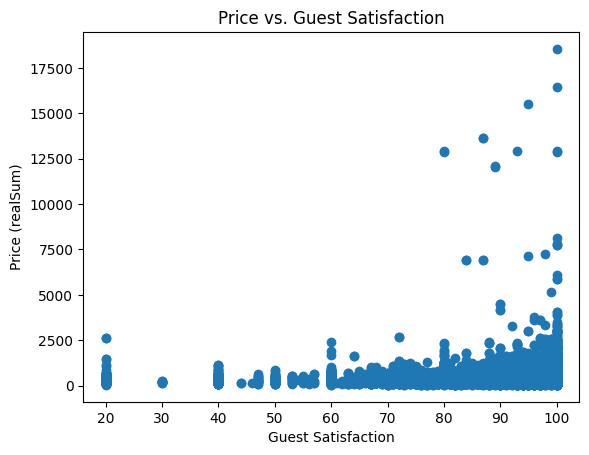

In [ ]:
def rank_cities_by_satisfaction(df):
    """
    Rank cities based on guest satisfaction (highest to lowest).

    This function calculates the average guest satisfaction score for each city in the DataFrame
    and ranks the cities from most to least satisfying stay.

    Parameters:
        df (pandas.DataFrame): The input DataFrame containing relevant columns, including 'city' and 'guest_satisfaction_overall'.

    Returns:
        pandas.Series: A Series containing the city ranking from most to least satisfying stay.
    """
    # Calculate city ranking based on guest satisfaction
    city_ranking = df.groupby('city')['guest_satisfaction_overall'].mean().sort_values(ascending=False)

    # Print the city ranking
    print("\nCity Ranking from Most to Least Satisfying Stay:")
    print(city_ranking)

    return city_ranking


def compare_satisfaction_by_price_segment(df):
    """
    Compare guest satisfaction for different price segments (top 2% vs. bottom 2%).

    This function correlates the mean guest satisfaction per city with the realSum percentile for different price segments.
    It ranks the cities based on guest satisfaction for affluent and young/student customers.

    Parameters:
        df (pandas.DataFrame): The input DataFrame containing relevant columns, including 'city', 'realSum', and 'guest_satisfaction_overall'.

    Returns:
        pandas.Series: Two Series containing city rankings for the top 2% and bottom 2% price segments.
    """
    # Outliers: Define the price percentiles for top and bottom prices
    top_percentiles = [98]  # tested all top 90 to 99.99%
    bottom_percentiles = [2]  # [0.1, 2, 10]

    # Calculate the price thresholds for top and bottom prices
    top_price_thresholds = np.percentile(df['realSum'], top_percentiles)
    bottom_price_thresholds = np.percentile(df['realSum'], bottom_percentiles)

    # Divide the DataFrame into two groups based on price percentiles
    top_prices_df = df[df['realSum'] >= top_price_thresholds[-1]]
    bottom_prices_df = df[df['realSum'] <= bottom_price_thresholds[0]]

    # Calculate the mean guest_satisfaction_overall per city for top prices
    top_city_ranking = top_prices_df.groupby('city')['guest_satisfaction_overall'].mean().sort_values(ascending=False)

    # Calculate the mean guest_satisfaction_overall per city for bottom prices
    bottom_city_ranking = bottom_prices_df.groupby('city')['guest_satisfaction_overall'].mean().sort_values(ascending=False)

    # Print the rankings for top and bottom prices
    print("\n\n City ranking guest_satisfaction_overall for Top 2% Prices (Affluent Customers):")
    for i, percentile in enumerate(top_percentiles):
        print(top_city_ranking.head())
        print()

    print("City ranking guest_satisfaction_overall for Bottom 2% Prices (Young / Student):")
    for i, percentile in enumerate(bottom_percentiles):
        print(bottom_city_ranking.head())
        print()

    return top_city_ranking, bottom_city_ranking


def plot_satisfaction_vs_price(df):
    """
    Scatter plot of Guest Satisfaction vs. Price segment distribution.

    This function creates a scatter plot to visualize the correlation between guest satisfaction and price segments.

    Parameters:
        df (pandas.DataFrame): The input DataFrame containing relevant columns, including 'realSum' and 'guest_satisfaction_overall'.

    Returns:
        None (Displays the scatter plot).
    """
    # Scatter plot Satisfaction vs. Price segment distrib
    plt.scatter(df['guest_satisfaction_overall'], df['realSum'])
    plt.ylabel('Price (realSum)')
    plt.xlabel('Guest Satisfaction')
    plt.title('Price vs. Guest Satisfaction')
    plt.savefig('p0.png')
    plt.show()


# Call the functions with the DataFrame containing relevant columns
city_ranking = rank_cities_by_satisfaction(df)
top_city_ranking, bottom_city_ranking = compare_satisfaction_by_price_segment(df)
plot_satisfaction_vs_price(df)


### Market Study: Satisfaction vs. Price, Distance, Cleanliness and Attractivity per market segment
#### Step 4: Analyze the data by performing market studies, correlation analysis etc.

In [ ]:
def market_nano_study_correlations(df):
    """
    Perform a market nano-study by calculating correlations between Guest Satisfaction and Price, Distance, 
    Cleanliness, and Attractivity per market segment.

    Parameters:
        df (pd.DataFrame): DataFrame containing relevant columns, including 'guest_satisfaction_overall', 'realSum', 
                           'dist', 'cleanliness_rating', and 'attr_index'.

    Returns:
        None (Prints correlation coefficients for each subset).
    """

    # Calculate the price thresholds for the top 5%, central +/- sigma, and bottom 5%
    price_95th_percentile = df['realSum'].quantile(0.95)
    price_5th_percentile = df['realSum'].quantile(0.05)
    price_mean = df['realSum'].mean()
    price_std = df['realSum'].std()

    # Filter the data for the top 5% (affluent)
    top_5_percent_data = df[df['realSum'] > price_95th_percentile]

    # Filter the data for the central +/- sigma
    central_data = df[(df['realSum'] >= price_mean - price_std) & (df['realSum'] <= price_mean + price_std)]

    # Filter the data for the bottom 5% (students)
    bottom_5_percent_data = df[df['realSum'] < price_5th_percentile]

    # Calculate and print the correlation coefficients for each subset
    print("Correlation for Top 5% (Affluent):",
          top_5_percent_data['realSum'].corr(top_5_percent_data['guest_satisfaction_overall']))
    print("Correlation for avg. market @ 1Sigma:",
          central_data['realSum'].corr(central_data['guest_satisfaction_overall']))
    print("Correlation for Bottom 5% (Students):",
          bottom_5_percent_data['realSum'].corr(bottom_5_percent_data['guest_satisfaction_overall']))

    # Calculate and print the correlation between Guest Satisfaction and Distance
    correlation_distance = df['guest_satisfaction_overall'].corr(df['dist'])
    print(f"Correlation between Guest Satisfaction and Downtown Distance: {correlation_distance}")

    # Calculate and print the correlation between Guest Satisfaction and Attractivity Index
    correlation_attr_index = df['guest_satisfaction_overall'].corr(df['attr_index'])
    print(f"Correlation between Guest Satisfaction and Attractivity Index: {correlation_attr_index}")

    # Calculate and print the correlation between Guest Satisfaction and Cleanliness Rating
    correlation_cleanliness = df['guest_satisfaction_overall'].corr(df['cleanliness_rating'])
    print(f"Correlation between Guest Satisfaction and Cleanliness Rating: {correlation_cleanliness} <= Primary! ")

market_nano_study_correlations(df)

Correlation for Top 5% (Affluent): 0.035923454692673766
Correlation for avg. market @ 1Sigma: -0.03728457202202954
Correlation for Bottom 5% (Students): 0.044198024832158074
Correlation between Guest Satisfaction and Downtown Distance: -0.004178420362120722
Correlation between Guest Satisfaction and Attractivity Index: -0.05062391837660107
Correlation between Guest Satisfaction and Cleanliness Rating: 0.7140450220820533 <= Primary! 


#### Net: Cleanliness (0.7) dominates all the other features, incl. Attractivity, Distance etc.

# Airbnb Impact Analysis on EU Cities

### Q5: Is Airbnb really outpricing the locals out of their homes?

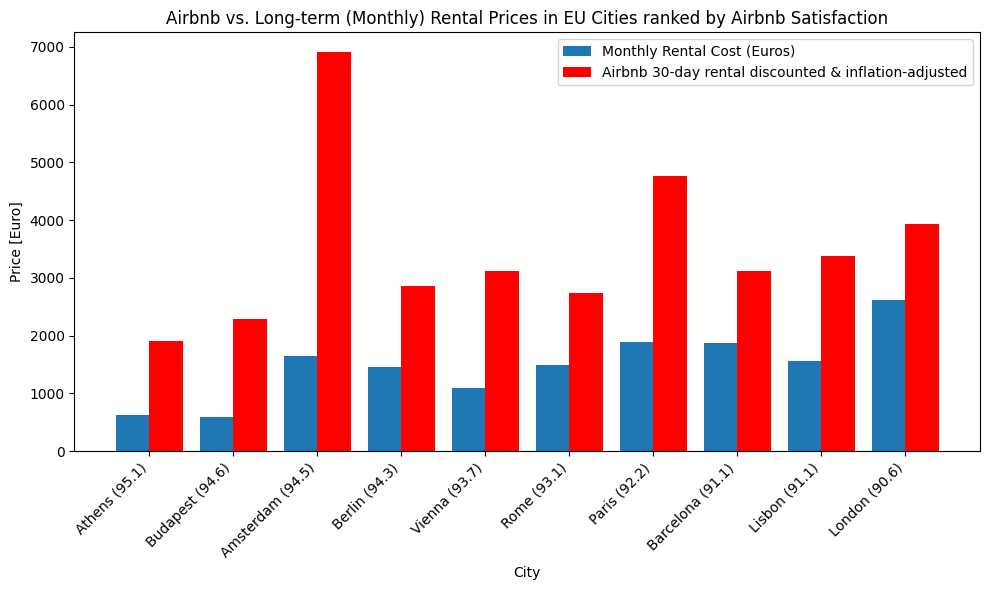

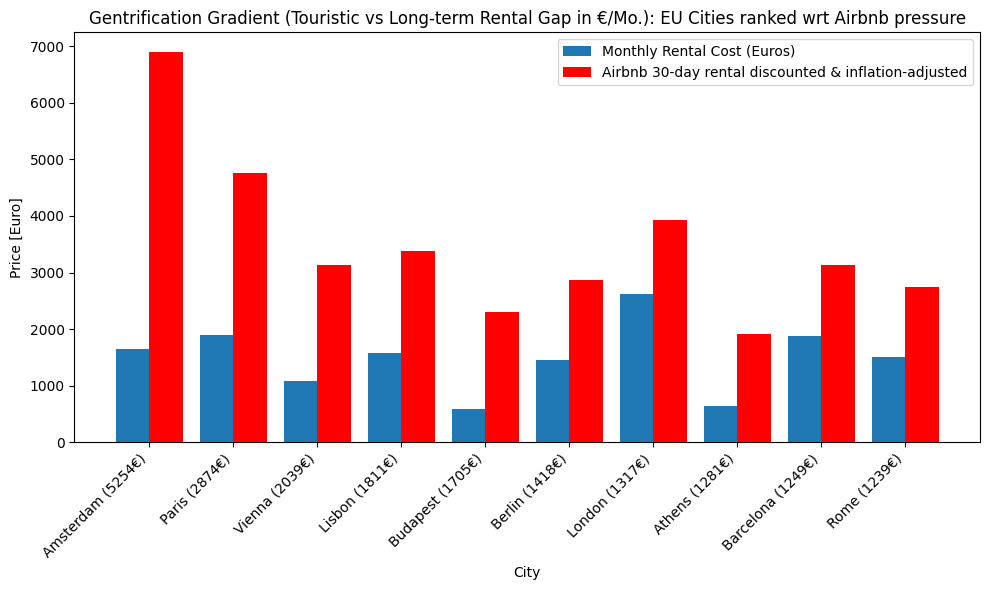

In [ ]:
def plot_airbnb_vs_long_term_prices():
    """
    Plot Airbnb vs. Long-term (Monthly) Rental Prices in EU Cities ranked by Airbnb Satisfaction.

    Returns:
        None (Displays the plot).
    """

    # Data for the plot cities ranked from Most to Least Satisfying Stay
    cities = ['Athens', 'Budapest', 'Amsterdam', 'Berlin', 'Vienna', 'Rome', 'Paris', 'Barcelona', 'Lisbon', 'London']
    monthly_rental_cost = [635, 590, 1650, 1450, 1088, 1500, 1890, 1875, 1570, 2612.50]
    median_realSum_scaled = [1915.732253, 2294.731399, 6903.662745, 2867.626439, 3127.410423, 2738.877318, 4763.955005, 3124.490900, 3380.628526, 3929.424249]
    city_ranking = [95.1, 94.6, 94.5, 94.3, 93.7, 93.1, 92.2, 91.1, 91.1, 90.6]

    # Create an array of positions for the bars
    x = np.arange(len(cities))

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.bar(x, monthly_rental_cost, width=0.4, label='Monthly Rental Cost (Euros)')
    plt.bar(x + 0.4, median_realSum_scaled, width=0.4, label='Airbnb 30-day rental discounted & inflation-adjusted', color='red')
    plt.xticks(x + 0.2, [f'{city} ({ranking})' for city, ranking in zip(cities, city_ranking)], rotation=45, ha='right')
    plt.xlabel('City')
    plt.ylabel('Price [Euro]')
    plt.title('Airbnb vs. Long-term (Monthly) Rental Prices in EU Cities ranked by Airbnb Satisfaction')
    plt.legend()
    plt.tight_layout()
    plt.savefig('p1.png')
    plt.show()
    print("\n\n\n")

    # Gentrification Gradient graph: Cities ranked wrt. Airbnb Pressure (touristic vs. long-term rent differential)
    cities = ['Athens', 'Budapest', 'Vienna', 'Lisbon', 'Paris', 'Amsterdam', 'London', 'Barcelona', 'Rome', 'Berlin']
    monthly_rental_cost = [635, 590, 1088, 1570, 1890, 1650, 2612.50, 1875, 1500, 1450]
    median_realSum_scaled = [1915.732253, 2294.731399, 3127.410423, 3380.628526, 4763.955005, 6903.662745, 3929.424249, 3124.490900, 2738.877318, 2867.626439]

    # Calculate the delta (difference) between the two values for each city
    delta_values = [median - rental for median, rental in zip(median_realSum_scaled, monthly_rental_cost)]

    # Sort the cities based on the delta values in descending order (from highest to lowest delta)
    sorted_cities = [city for _, city in sorted(zip(delta_values, cities), reverse=True)]
    sorted_delta_values = [round(delta) for _, delta in sorted(zip(delta_values, delta_values), reverse=True)]

    # Create an array of positions for the bars
    x = np.arange(len(cities))

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.bar(x, [monthly_rental_cost[cities.index(city)] for city in sorted_cities], width=0.4, label='Monthly Rental Cost (Euros)')
    plt.bar(x + 0.4, [median_realSum_scaled[cities.index(city)] for city in sorted_cities], width=0.4, label='Airbnb 30-day rental discounted & inflation-adjusted', color='red')
    plt.xticks(x + 0.2, [f'{city} ({delta}€)' for city, delta in zip(sorted_cities, sorted_delta_values)], rotation=45, ha='right')
    plt.xlabel('City')
    plt.ylabel('Price [Euro]')
    plt.title('Gentrification Gradient (Touristic vs Long-term Rental Gap in €/Mo.): EU Cities ranked wrt Airbnb pressure')
    plt.legend()
    plt.tight_layout()
    plt.savefig('p2.png')
    plt.show()
    print("\n\n\n")

plot_airbnb_vs_long_term_prices()

#### Net: Re-allocating the available real estate to Airbnb rentals seems profitable, particularly where the standard rents are regulated

### Linear Models' Fittings: From Global to Per-City 
#### Step 5: Model the data using linear regression and other techniques to predict rental prices.
#### Modeling method: Train a baseline linear regression model using all features and evaluate its performance. Fit linear
#### regression models for each city separately and rank cities based on their price predictability. Continue w/ L1 and L2 LMs and per city models.
#### Evaluation: Evaluate the performance of the models using metrics such as RMSE (Root Mean Squared Error) and
#### R-squared (R2) to measure the goodness-of-fit.

In [ ]:
def linear_modelling():
    """
    Perform Linear Modelling on the given dataset with different feature sets.

    Returns:
        None (Displays the evaluation metrics for different models).
    """

    # Baseline: Global/EU-wide LM with all cities & features
    X_baseline = df[['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
                     'cleanliness_rating', 'guest_satisfaction_overall',  'bedrooms',
                     'dist', 'metro_dist', 'multi', 'biz', 'lng', 'lat']]
    y_baseline = df['realSum']

    # Split the data into training and testing sets (60/40 split)
    X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
        X_baseline, y_baseline, test_size=0.4, random_state=42)

    # Train the baseline Linear Regression model
    lm_baseline = LinearRegression()
    lm_baseline.fit(X_train_baseline, y_train_baseline)

    # Evaluate the baseline model
    rmse_baseline = mean_squared_error(y_test_baseline, lm_baseline.predict(X_test_baseline), squared=False)
    r2_baseline = r2_score(y_test_baseline, lm_baseline.predict(X_test_baseline))

    print("\n\n (1) Baseline: All features LM:")
    print(f"RMSE: {round(rmse_baseline, 3)}")
    print(f"R-squared (R2): {round(r2_baseline, 3)}")


    #=============Per City LM Fit===========================
    # List of cities
    cities = df['city'].unique()

    # Create an empty dictionary to store the R2 and RMSE values for each city
    metrics_by_city = {}

    # Loop through each city and calculate the R2 and RMSE values
    for city in cities:
        # Select data for the current city
        X_city = X_baseline[df['city'] == city]
        y_city = y_baseline[df['city'] == city]

        # Split the data into training and testing sets (60/40 split)
        X_train_city, X_test_city, y_train_city, y_test_city = train_test_split(
            X_city, y_city, test_size=0.4, random_state=42)

        # Train the Linear Regression model for the current city
        lm_city = LinearRegression()
        lm_city.fit(X_train_city, y_train_city)

        # Calculate the R2 value for the current city
        r2_city = r2_score(y_test_city, lm_city.predict(X_test_city))

        # Calculate the RMSE for the current city
        rmse_city = mean_squared_error(y_test_city, lm_city.predict(X_test_city), squared=False)

        # Store the R2 and RMSE values in the dictionary
        metrics_by_city[city] = {'R2': r2_city, 'RMSE': rmse_city}

    # Sort the cities based on their R2 values in descending order (from best to worst fit)
    sorted_cities = sorted(metrics_by_city.items(), key=lambda x: x[1]['R2'], reverse=True)

    # Print the ranked list of cities
    print(f"\nRanked list of cities based on price predictability (R-squared and RMSE):")
    for rank, (city, metrics) in enumerate(sorted_cities, start=1):
        r2_value = round(metrics['R2'], 3)
        rmse_value = round(metrics['RMSE'], 3)
        print(f"{rank}. {city}: R2 = {r2_value}, RMSE = {rmse_value}")

    # Try L1 and L2 penalty LM for most/Lisbon and least/Vienna LM-predictable cities
    l1_lm = Lasso(alpha=0.1)  # L1 (Lasso) penalty
    l2_lm = Ridge(alpha=0.1)  # L2 (Ridge) penalty

    # Select data for Lisbon and Vienna
    X_lisbon = X_baseline[df['city'] == 'lisbon']
    y_lisbon = y_baseline[df['city'] == 'lisbon']

    X_vienna = X_baseline[df['city'] == 'vienna']
    y_vienna = y_baseline[df['city'] == 'vienna']

    # Split the data into training and testing sets (60/40 split) for Lisbon
    X_train_lisbon, X_test_lisbon, y_train_lisbon, y_test_lisbon = train_test_split(
        X_lisbon, y_lisbon, test_size=0.4, random_state=42)

    # Split the data into training and testing sets (60/40 split) for Vienna
    X_train_vienna, X_test_vienna, y_train_vienna, y_test_vienna = train_test_split(
        X_vienna, y_vienna, test_size=0.4, random_state=42)

    # Train L1 and L2 penalty models for Lisbon
    l1_lm.fit(X_train_lisbon, y_train_lisbon)
    l2_lm.fit(X_train_lisbon, y_train_lisbon)

    # Evaluate L1 and L2 models for Lisbon
    r2_l1_lisbon = r2_score(y_test_lisbon, l1_lm.predict(X_test_lisbon))
    rmse_l1_lisbon = mean_squared_error(y_test_lisbon, l1_lm.predict(X_test_lisbon), squared=False)

    r2_l2_lisbon = r2_score(y_test_lisbon, l2_lm.predict(X_test_lisbon))
    rmse_l2_lisbon = mean_squared_error(y_test_lisbon, l2_lm.predict(X_test_lisbon), squared=False)

    # Train L1 and L2 penalty models for Vienna
    l1_lm.fit(X_train_vienna, y_train_vienna)
    l2_lm.fit(X_train_vienna, y_train_vienna)

    # Evaluate L1 and L2 models for Vienna
    r2_l1_vienna = r2_score(y_test_vienna, l1_lm.predict(X_test_vienna))
    rmse_l1_vienna = mean_squared_error(y_test_vienna, l1_lm.predict(X_test_vienna), squared=False)

    r2_l2_vienna = r2_score(y_test_vienna, l2_lm.predict(X_test_vienna))
    rmse_l2_vienna = mean_squared_error(y_test_vienna, l2_lm.predict(X_test_vienna), squared=False)

    # Print the results for L1 and L2 penalty models for Lisbon and Vienna
    print("\nL1 and L2 penalty models for Lisbon:")
    print(f"L1 - R2: {round(r2_l1_lisbon, 3)}, RMSE: {round(rmse_l1_lisbon, 3)}")
    print(f"L2 - R2: {round(r2_l2_lisbon, 3)}, RMSE: {round(rmse_l2_lisbon, 3)}")

    print("\nL1 and L2 penalty models for Vienna:")
    print(f"L1 - R2: {round(r2_l1_vienna, 3)}, RMSE: {round(rmse_l1_vienna, 3)}")
    print(f"L2 - R2: {round(r2_l2_vienna, 3)}, RMSE: {round(rmse_l2_vienna, 3)}")


    #================
    #Baseline: Manual naive feature selection
    X_baseline = df[['person_capacity', 'bedrooms', 'dist', 'metro_dist', 'attr_index_norm',
                     'guest_satisfaction_overall', 'rest_index_norm']]
    y_baseline = df['realSum']

    # Split the data into training and testing sets (60/40 split)
    X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
        X_baseline, y_baseline, test_size=0.4, random_state=42)

    # Train the baseline Linear Regression model
    lm_baseline = LinearRegression()
    lm_baseline.fit(X_train_baseline, y_train_baseline)

    # Evaluate the baseline model
    rmse_baseline = mean_squared_error(y_test_baseline, lm_baseline.predict(X_test_baseline), squared=False)
    r2_baseline = r2_score(y_test_baseline, lm_baseline.predict(X_test_baseline))

    print("\n\n (2) Baseline: Manual feat sel. LM Evaluation:")
    print(f"RMSE: {round(rmse_baseline, 3)}")
    print(f"R-squared (R2): {round(r2_baseline, 3)}")

linear_modelling()




 (1) Baseline: All features LM:
RMSE: 350.232
R-squared (R2): 0.156

Ranked list of cities based on price predictability (R-squared and RMSE):
1. lisbon: R2 = 0.488, RMSE = 77.923
2. amsterdam: R2 = 0.398, RMSE = 345.804
3. london: R2 = 0.266, RMSE = 368.272
4. rome: R2 = 0.265, RMSE = 103.167
5. berlin: R2 = 0.261, RMSE = 153.206
6. barcelona: R2 = 0.202, RMSE = 307.495
7. paris: R2 = 0.167, RMSE = 368.186
8. budapest: R2 = 0.085, RMSE = 115.316
9. athens: R2 = 0.014, RMSE = 405.294
10. vienna: R2 = 0.014, RMSE = 498.935

L1 and L2 penalty models for Lisbon:
L1 - R2: 0.485, RMSE: 78.128
L2 - R2: 0.488, RMSE: 77.929

L1 and L2 penalty models for Vienna:
L1 - R2: 0.014, RMSE: 498.918
L2 - R2: 0.014, RMSE: 498.932


 (2) Baseline: Manual feat sel. LM Evaluation:
RMSE: 355.904
R-squared (R2): 0.128


#### Lackluster results across EU begs for further investigations...

### Feature Eng. #1: Try Log and Standard Scaling to improve LM's explainability and accuracy
#### Perform feature engineering, such as converting boolean features to numeric representation and applying logarithmic
#### transformations to distance-related features. 


In [ ]:
def log_distances_linear_modelling():
    """
    Perform Linear Modelling with log-transformed distances on the given dataset.

    Returns:
        None (Displays the evaluation metrics for the model).
    """

    # Log distances: Select relevant features and target variable
    X_baseline = df[['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
                     'cleanliness_rating', 'guest_satisfaction_overall',
                     'bedrooms', 'dist', 'metro_dist', 'multi', 'biz', 'lng', 'lat']]
    y_baseline = df['realSum']

    # Convert boolean features to numeric representation (0 for False, 1 for True)
    bool_features = ['room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']
    X_baseline[bool_features] = X_baseline[bool_features].astype(int)

    # Apply logarithmic transformation on 'dist' and 'metro_dist'
    log_features = ['dist', 'metro_dist']
    X_baseline[log_features] = np.log1p(X_baseline[log_features])

    # Split the data into training and testing sets (60/40 split)
    X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
        X_baseline, y_baseline, test_size=0.4, random_state=42)

    # Train the baseline Linear Regression model
    lm_baseline = LinearRegression()
    lm_baseline.fit(X_train_baseline, y_train_baseline)

    # Make predictions on the test data
    y_test_pred_baseline = lm_baseline.predict(X_test_baseline)

    # Evaluate the baseline model
    rmse_baseline = mean_squared_error(y_test_baseline, y_test_pred_baseline, squared=False)
    r2_baseline = r2_score(y_test_baseline, y_test_pred_baseline)

    print("\n\n (3) LM all feats w/ log(distances) transformation):")
    print(f"RMSE: {round(rmse_baseline, 3)}")
    print(f"R-squared (R2): {round(r2_baseline, 3)}")


def standard_scaled_linear_modelling():
    """
    Perform Linear Modelling with Standard Scaled features on the given dataset.

    Returns:
        None (Displays the evaluation metrics for the model).
    """

    # StdScaler: Select relevant features and target variable
    X_baseline = df[['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
                     'cleanliness_rating', 'guest_satisfaction_overall',
                     'bedrooms', 'dist', 'metro_dist', 'multi', 'biz', 'lng', 'lat']]
    y_baseline = df['realSum']

    # Convert boolean features to numeric representation (0 for False, 1 for True)
    bool_features = ['room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']
    X_baseline[bool_features] = X_baseline[bool_features].astype(int)

    # Split the data into training and testing sets (60/40 split)
    X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
        X_baseline, y_baseline, test_size=0.4, random_state=42)

    # Select the numerical features to be scaled
    numerical_features = ['person_capacity', 'bedrooms', 'dist', 'metro_dist',
                          'cleanliness_rating', 'guest_satisfaction_overall',
                          'lng', 'lat']

    # Create a StandardScaler object
    scaler = StandardScaler()

    # Fit and transform the numerical features in the training set
    X_train_baseline[numerical_features] = scaler.fit_transform(X_train_baseline[numerical_features])

    # Transform the numerical features in the test set
    X_test_baseline[numerical_features] = scaler.transform(X_test_baseline[numerical_features])

    # Train the baseline Linear Regression model
    lm_baseline = LinearRegression()
    lm_baseline.fit(X_train_baseline, y_train_baseline)

    # Make predictions on the test data
    y_test_pred_baseline = lm_baseline.predict(X_test_baseline)

    # Evaluate the baseline model
    rmse_baseline = mean_squared_error(y_test_baseline, y_test_pred_baseline, squared=False)
    r2_baseline = r2_score(y_test_baseline, y_test_pred_baseline)

    print("\n\n (4) LM w/ StdScaled features:")
    print(f"RMSE: {round(rmse_baseline, 3)}")
    print(f"R-squared (R2): {round(r2_baseline, 3)}")


# Call the functions
log_distances_linear_modelling()
standard_scaled_linear_modelling()



 (3) LM all feats w/ log(distances) transformation):
RMSE: 350.463
R-squared (R2): 0.155


 (4) LM w/ StdScaled features:
RMSE: 350.232
R-squared (R2): 0.156


#### Neither log nor standard scaling improve the LM fit. Other solutions are required...

### Feature eng. #2: Clipping for Outlier Control
#### Given the failure to improve via log and scaling, we resort to minimal clipping: 
#### Clip outlier rows based on the target variable (rental prices) using fixed percentiles from visual optimisation.




(5) Outlier Impact on R2 and RSME


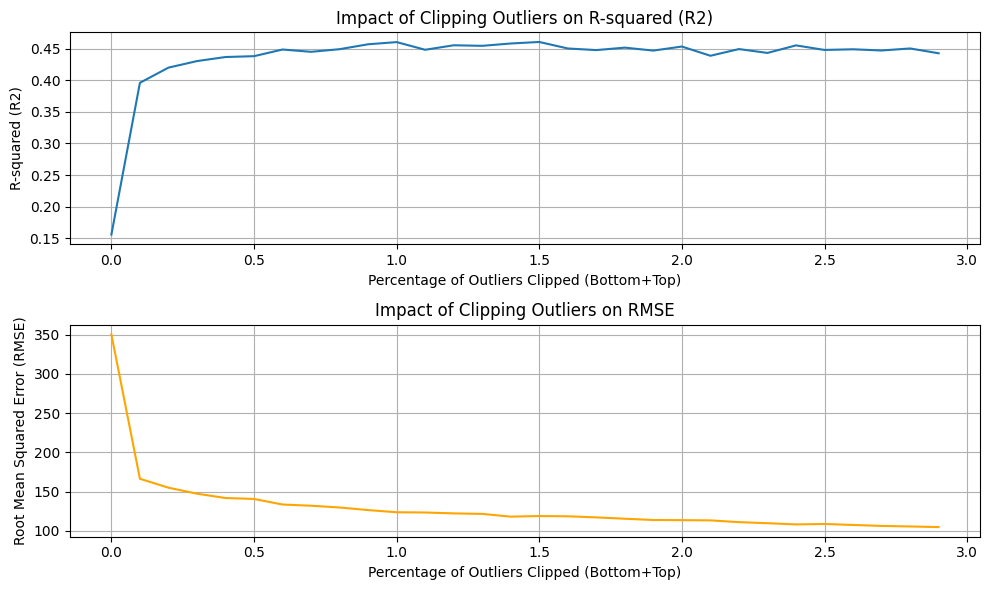

In [ ]:
def outlier_clipping_plots(X_baseline, y_baseline):
    """
    Perform Linear Modelling with outlier clipping and visualize the impact on R-squared (R2) and RMSE.

    Parameters:
        X_baseline (DataFrame): Input features.
        y_baseline (Series): Target variable.

    Returns:
        None (Displays the plot with R2 and RMSE values).
    """

    ## Define the clipping percentages for both top and bottom outliers
    bottom_percentages = np.arange(0.0, 3.0, 0.1).tolist()
    top_percentages = np.arange(100.0, 97.0, -0.1).tolist()

    # Initialize lists to store the RMSE and R2 values for each clipping scenario
    rmse_values = []
    r2_values = []

    # Loop through the clipping percentages
    for bottom, top in zip(bottom_percentages, top_percentages):
        # Calculate the clipping threshold for bottom and top
        bottom_threshold = np.percentile(y_baseline, bottom)
        top_threshold = np.percentile(y_baseline, top)

        # Clip the outliers
        clipped_indices = (y_baseline >= bottom_threshold) & (y_baseline <= top_threshold)
        X_clipped = X_baseline[clipped_indices]
        y_clipped = y_baseline[clipped_indices]

        # Split the data into training and testing sets (60/40 split)
        X_train_clipped, X_test_clipped, y_train_clipped, y_test_clipped = train_test_split(
            X_clipped, y_clipped, test_size=0.4, random_state=42)

        # Train the baseline Linear Regression model
        lm_clipped = LinearRegression()
        lm_clipped.fit(X_train_clipped, y_train_clipped)

        # Make predictions on the test data
        y_test_pred_clipped = lm_clipped.predict(X_test_clipped)

        # Evaluate the model
        rmse_clipped = mean_squared_error(y_test_clipped, y_test_pred_clipped, squared=False)
        r2_clipped = r2_score(y_test_clipped, y_test_pred_clipped)

        # Append RMSE and R2 values to the lists
        rmse_values.append(rmse_clipped)
        r2_values.append(r2_clipped)

    # Plotting the results
    print('\n\n\n(5) Outlier Impact on R2 and RSME')
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(bottom_percentages, r2_values, label='R2')
    plt.xlabel('Percentage of Outliers Clipped (Bottom+Top)')
    plt.ylabel('R-squared (R2)')
    plt.title('Impact of Clipping Outliers on R-squared (R2)')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(bottom_percentages, rmse_values, label='RMSE', color='orange')
    plt.xlabel('Percentage of Outliers Clipped (Bottom+Top)')
    plt.ylabel('Root Mean Squared Error (RMSE)')
    plt.title('Impact of Clipping Outliers on RMSE')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('p3.png')
    plt.show()

X_baseline = df[['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
                 'cleanliness_rating', 'guest_satisfaction_overall',
                 'bedrooms', 'dist', 'metro_dist', 'multi', 'biz', 'lng', 'lat']]
y_baseline = df['realSum']
outlier_clipping_plots(X_baseline, y_baseline)

#### Plots suggest that even minimal (under <1%) clipping could dramatically improve both r2 (explainability) and RMSE (accuracy) of prediction.

# Feature eng. #3: Refit LM with optimal (min.) clipping

#### Final decision on feature engineering to improve LM's explainability and accuracy => 0.6% clipping

In [ ]:
def best_global_lr_model(df):
    """
    Train and evaluate the best global Linear Regression model across all cities.
    Perform price outlier removal by clipping the 'realSum' outlier rows based on fixed percentiles.

    Parameters:
        df (DataFrame): The input dataset containing relevant features and target variable 'realSum'.

    Returns:
        None (Prints the evaluation results for the model).
    """
    # Define the boolean features
    bool_features = ['room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']

    # Use the prior plots to visually detect the max of F1-LM = 2*R + RSME
    # Calculate the bottom and top X percentiles of the target variable 'realSum'
    price_percentile_lo = np.percentile(df['realSum'], 0.6)
    price_percentile_hi = np.percentile(df['realSum'], 99.4)

    # Clip outlier rows based on the percentiles
    df_clipped = df[(df['realSum'] >= price_percentile_lo) & (df['realSum'] <= price_percentile_hi)]

    # Reassign the clipped features and target variable
    X_clipped = df_clipped[['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
                            'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
                            'bedrooms', 'dist', 'metro_dist', 'lng', 'lat']]
    y_clipped = df_clipped['realSum']

    # Convert boolean features to numeric representation (0 for False, 1 for True)
    X_clipped[bool_features] = X_clipped[bool_features].astype(int)

    # Split the clipped data into training and testing sets (60/40 split)
    X_train_clipped, X_test_clipped, y_train_clipped, y_test_clipped = train_test_split(
        X_clipped, y_clipped, test_size=0.4, random_state=42)

    # Train the Linear Regression model on the clipped training data
    lm_clipped = LinearRegression()
    lm_clipped.fit(X_train_clipped, y_train_clipped)

    # Make predictions on the test data using the clipped model
    y_test_pred_clipped = lm_clipped.predict(X_test_clipped)

    # Evaluate the clipped model
    rmse_clipped = mean_squared_error(y_test_clipped, y_test_pred_clipped, squared=False)
    r2_clipped = r2_score(y_test_clipped, y_test_pred_clipped)

    # Calculate the number of rows dropped after clipping
    num_rows_dropped = len(df) - len(df_clipped)

    print(f"\n\nNumber of rows dropped after 0.6% outlier clipping: {num_rows_dropped}")
    print("(6) LM with clipped 0.6% outliers:")
    print(f"RMSE: {rmse_clipped:.3f}")
    print(f"R-squared (R2): {r2_clipped:.3f}")
    print("\n\n")


# Call the function with the DataFrame containing relevant features and target variable
best_global_lr_model(df)



Number of rows dropped after 0.6% outlier clipping: 620
(6) LM with clipped 0.6% outliers:
RMSE: 133.631
R-squared (R2): 0.449





#### Baseline global LR model with all features was => RMSE: 350.232  R-squared (R2): 0.156
#### Conclusion: A 0.6% outlier clipping leads to ~3x better fit at a min. cost in data loss (drop 620 out of 52K rows)


#### No deployment: This notebook focuses on data analysis and linear modeling.